In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('advertising.csv')

In [6]:
df = pd.read_csv('../../1_Gaussian_Distribution/data/vehicles_v2.csv')

FileNotFoundError: [Errno 2] File ../../1_Gaussian_Distribution/data/vehicles_v2.csv does not exist: '../../1_Gaussian_Distribution/data/vehicles_v2.csv'

In [7]:
from pandas_profiling import ProfileReport

ModuleNotFoundError: No module named 'pandas_profiling'

In [8]:
profile = ProfileReport(df, minimal=True)

NameError: name 'ProfileReport' is not defined

In [ ]:
profile

In [ ]:
profile.to_file('output.html')

In [ ]:
df = pd.read_csv('../../2_Pivot_Table/pivot_table/ratings.csv')

In [ ]:
df.head()

In [ ]:
from pivottablejs import pivot_ui

pivot_ui(df)

In [ ]:
df = pd.read_csv('advertising.csv')
df

-----

# Some theory

> The regression sole purpose in life is to <b>find a curve that best fits the data points</b>. 

-----

There are two main **applications** for finding best lines between variables:

<u><b> Describe: </b></u>
- Use <b> regression </b> to determine the strength of the relationship between the variable you are interested in and the other variables. 

<u><b> Predict: </b></u>
- Use <b> regression </b> to predict values of new data points. 

------

<u><b> Degrees of freedom </b></u>

A regression line is one of the simplest models. We say it has <b>few degrees of freedom</b>. Namely, a linear regression has <b> two degrees of freedom - the slope and the intercept. </b>

<u><b> Slope:</b></u> The angular coefficient of the linear regression. The greater this number is, the more impact of that specific variable on the Y variable.

<u><b> Intercept:</b></u> The value of Y for which X equals 0.

$$y = a + b x $$

$a \rightarrow$ intercept

$b \rightarrow$ slope

![title](lin_reg.png)

# Measuring your error.

## Error terms: 

<u>1. Residuals</u>

$Y_{observed} - Y_{predicted}$

<u>2. Sum of Residuals</u>

$\sum_{i = 1}^{n} (Y_{observed} - Y_{predicted})$

- This might cancel the errors.

<u>3. Sum of square of residuals</u>

$\sum_{i = 1}^{n} (Y_{observed} - Y_{predicted})^2$

- Heavily penalize higher error value.
- Not robust to outliers.


Linear regression looks for optimizing the intercept and coefficients such that it minimizes the objective function. The objective function is a simple measure of error: 


## <u> Objective Function (Cost Function)</u> 

Minimize the objective function:
- Objective function for **Mean** Squared Error (MSE): $\frac{1}{n} \sum_{i = 1}^{n} (Y_{observed} - Y_{predicted})^2$



Since it tries to make the **mean** error as small as possible, how do you think outliers affect the linear regression?

<b> Outlier greatly affect the regression </b>

In practice:

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = df[['TV']]
y = df['Sales']

model.fit(X, y)

LinearRegression()

In [10]:
y_observed = df['Sales']
y_predicted = model.predict(df[['TV']])

In [11]:
list(zip(y_observed, y_predicted))

[(22.1, 19.73726517327539),
 (10.4, 9.44300377412526),
 (12.0, 7.928815540306303),
 (16.5, 15.37773421436806),
 (17.9, 17.002851989126135),
 (7.2, 7.457364991315053),
 (11.8, 10.164045790229526),
 (13.2, 13.641686898670867),
 (4.8, 7.451818514268097),
 (15.6, 18.056682628047753),
 (12.6, 10.641042816267731),
 (17.4, 18.88310770804418),
 (9.2, 8.294883025405392),
 (13.7, 12.38263660901188),
 (19.0, 18.295181141066855),
 (22.4, 17.812637637981695),
 (12.5, 10.735332926065983),
 (24.4, 22.582607898363754),
 (11.3, 10.812983604723364),
 (14.6, 15.144782178395914),
 (18.0, 19.088327358781548),
 (17.5, 20.142157997703166),
 (5.6, 7.706956458428068),
 (20.5, 19.637428586430183),
 (9.7, 10.430276688483408),
 (17.0, 21.556509644676918),
 (15.0, 14.900737188329854),
 (20.9, 20.291912877970976),
 (18.9, 20.77445638105614),
 (10.5, 10.890634283380747),
 (21.4, 23.220452758763685),
 (11.9, 13.236794074243088),
 (13.2, 12.365997177871012),
 (17.4, 21.70626452494473),
 (11.9, 12.282800022166676),
 (1

In [12]:
residual_squared = []

for y_o, y_p in list(zip(y_observed, y_predicted)):
    residual = y_o - y_p
    residual_squared.append(residual ** 2)


In [13]:
np.mean(residual_squared)

5.2177438977951285

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
mean_squared_error(y_observed, y_predicted)

5.2177438977951285

## Root Mean Squared Error (RMSE)

### interpreting the mean squared error

5.2 sales² $\rightarrow$ out of our variable scale

2.28 sales

The average mean error I will have in my prediction in sales is 2.28 if I use only the TV as my predictive variable.

In [16]:
np.sqrt(mean_squared_error(y_observed, y_predicted))

2.2842381438447106

In [17]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [18]:
X

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [19]:
model.coef_

array([0.05546477])

In [20]:
np.sqrt(model.score(X, y))

0.9012079133023309

In [21]:
from sklearn.preprocessing import scale

In [22]:
(X - X.mean())/X.std()

,TV
0,0.967425
1,-1.194379
2,-1.512360
3,0.051919
4,0.393196
...,...
195,-1.267759
196,-0.615491
197,0.348934
198,1.590574


In [23]:
model.fit((X - X.mean())/X.std(), (y-y.mean())/y.std())

LinearRegression()

In [24]:
np.sqrt(model.score((X - X.mean())/X.std(), (y-y.mean())/y.std()))

0.9012079133023309

In [25]:
model.coef_

array([0.90120791])

## Coefficient of Determination $R^2$

What is important to understand?

> $R^2$ is a measure of how much information of our Y-variable is explained by our X-variable.

![title](lin_reg.png)

Mas sim, com certeza daria pra comparar com outro modelo, só substituindo o y_mean ali pelo seu y_predicted_por_outro_modelo. Muito legal essa ideia. A ideia mesmo que o R² tenta trazer é um pouco de:



In [26]:
y.mean()

15.130500000000001

In [27]:
df.corr().style.background_gradient()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<font size="5">

$R^2 = 1 - \frac{\sum_{i = 1}^{n}(y_{observed} - y_{predicted})^2}{\sum_{i = 1}^{n}(y_{observed} - y_{mean})^2}$
    
</font>

- Numerator: ~variance of model's prediction
- Denominator: ~variance



For example: if you measure your error considering your model and it result in 90. And you measure your error using only the mean you obtain 100, the R² will be:

$R² = 1 - \frac{90}{100} = 1 - 0.9 = 0.1$

This means that your model is 10% better than using only the average. This means that using the variable TV increased your performance by 10%

Moreover, remember that $(y_{obs} - y_{mean})^2$ is the variance. So it is also a measure of how much information that adding this variable brought to your model.

### In practice

- `r2_score`

- `model.score()`

In [51]:
from sklearn.metrics import r2_score

In [52]:
# mean
r2_score(y_observed, [y.mean() for i in range(len(y_observed))])

0.0

The `r2_score` method expects you to pass the `y_observed` (that comes from the real data) and the values you predicted, `y_predicted` (that comes from the `model.predict(X)` method).

In [33]:
r2_score(y_observed, y_predicted)

0.8121757029987414

Also, you could use the model's  `model.score(X, y)` method.

In [34]:
model

LinearRegression()

In [35]:
model.score()

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [36]:
model.score(X, y)

-684.0445949613566

## Using Newspaper

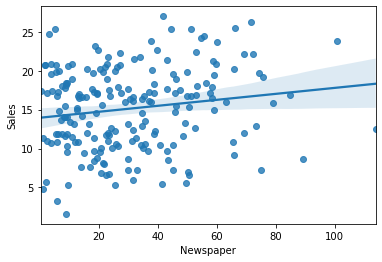

In [37]:
sns.regplot(df['Newspaper'], df['Sales'])

In [38]:
model = LinearRegression()

model.fit(df[['Newspaper']], df['Sales'])

model.score(df[['Newspaper']], df['Sales'])

0.024951369862864836

----

# Multiple Linear Regression

Same thing, except that now we'll use more than 1 predictor variable

$$y = a_0 + a_1 x_1 + a_2 x_2 + ... + a_n x_n$$

![title](mult_lin_reg.png)

In [39]:
X

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [40]:
X = df[['TV','Radio']]
y = df['Sales']

model.fit(X,y)

model.coef_

array([0.05444896, 0.10717457])

In [41]:
model.score(X, y)

0.9025896186081139

> Any number of variables can be used. It doesn't mean you should.

In [43]:
X = df[['TV','Radio','Newspaper']]
y = df['Sales']

X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [44]:
model.fit(X,y)

LinearRegression()

In [45]:
model.coef_

array([0.05444578, 0.10700123, 0.00033566])

In [46]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


0.9025896186081139

In [47]:
model.score(X, y)

0.9025912899684558

In [48]:
X[['TV']]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [49]:
X[['TV']].std()

TV    85.854236
dtype: float64

In [50]:
(X[['TV']] - X[['TV']].mean())/X[['TV']].std()

,TV
0,0.967425
1,-1.194379
2,-1.512360
3,0.051919
4,0.393196
...,...
195,-1.267759
196,-0.615491
197,0.348934
198,1.590574


# Standardization (Z-score)

Standardize a variables means: transform it into a variable that has **mean = 0** and **standard deviation = 1**. In this manner, all variables are scaled to the same scale!

$$X_{std} = \frac{X - \mu}{\sigma}$$

$\mu \rightarrow$ média

$\sigma \rightarrow$ desvio padrão

<br><br>
<b>Understanding:</b>

If $X_{std}$ > 0 $\rightarrow$ it means that that specific observation is <u>above average</u>

If $X_{std}$ < 0 $\rightarrow$ it means that that specific observation is <u>below average</u>

If $X_{std}$ = 0 $\rightarrow$ it means that that specific observation is <u>the average</u>

If $X_{std}$ = 1 $\rightarrow$ it means that that specific observation is <u>1 standard deviation above average</u>

If $X_{std}$ = -2 $\rightarrow$ it means that that specific observation is <u>2 standard deviations below average</u>


In [ ]:
# poor way to Standardize

X_std = (X - X.mean())/X.std()

In [ ]:
X_std.kurtosis()

In [ ]:
X_std.loc[X_std.Newspaper > 3, :]

In [ ]:
X_std

In [ ]:
# good way to Standardize

from sklearn.preprocessing import StandardScaler, scale

scaler = StandardScaler()
scaler.fit(X) # aprende a media e desvio padrão do seu X

In [ ]:
X_std = scaler.transform(X) # aplica a padronização baseada no mean e std que ele aprendeu no fit
X_std

In [ ]:
model = LinearRegression()

model.fit(X_std, y)

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
# the mean error I would have in sales is:
np.sqrt(mean_squared_error(y_observed, model.predict(X_std)))

# StatsModels

In [ ]:
import statsmodels.api as sm

In [ ]:
X

In [ ]:
sm.add_constant(X)

In [ ]:


# to calculate intercepts, statsmodel requires you to 'add a constant' (column of ones on your dataframe)
X = sm.add_constant(X)

'''
_______________________
 1  230.1  37.8  69.2        | a0 | = y1 
 1  44.5   39.3  45.1        | a1 | = y2
 1   ...                   x | a2 | = ...
 1                           | a3 | 
 1                           
 1  232.1  8.6   8.7                = y_n      
-----------------------
'''

## OLS (Ordinary Least Squares) has a different standard (y comes before X)
model = sm.OLS(y,X)

## Fitting doesn't require X and y (since you already passed it beforehand)
results = model.fit()

## predict is the same
predictions = results.predict(X)

In [ ]:
## statsmodel has some good reports
results.summary()